Develop a Restaurant Decision Assistant using simple backward chaining in Python. The assistant will help users decide on a suitable restaurant based on their preferences and dietary restrictions. The system will use backward chaining to infer the user's desired type of cuisine and dietary requirements by asking a series of questions. Based on the cuisine and dietary requirements select the restaurant from the dataset The Dataset of restaurants is:

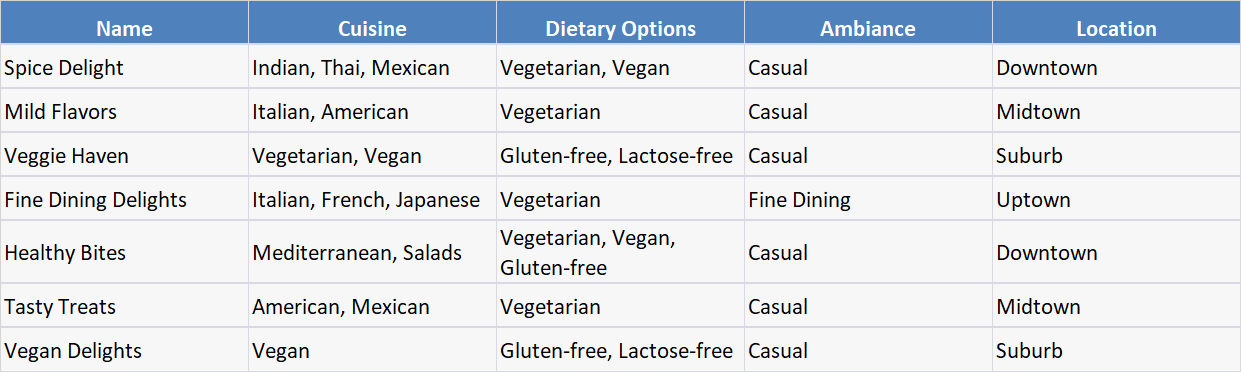

The Rules are:

1. If the user prefers spicy food, the system will suggest restaurants that offer cuisines like Indian, Thai, or Mexican, known for their spicy dishes.

2. If the user does not prefer spicy food, the system will suggest restaurants that serve milder cuisines such as Italian or American.

3. If the user follows a vegetarian diet, the system will recommend restaurants with a variety of vegetarian options, ensuring a satisfying dining experience.

4. If the user follows a vegan diet, the system will prioritize restaurants that offer vegan-friendly menus to cater to their dietary preferences.

5. If the user has specific dietary restrictions or allergies, the system will consider those limitations and suggest restaurants with suitable menu items, such as gluten-free or lactose-free options.

6. Based on the user's preference for a casual or fine-dining experience, the system will recommend restaurants that match the desired ambiance and style of dining.


7. The system may also consider the user's location to suggest nearby restaurants, making dining choices more convenient and accessible.

8. After considering all the user's responses, the system will provide a final restaurant recommendation that aligns with their inferred preferences and dietary needs.


## The Code

### Imports

In [6]:
import pandas as pd

### Load the dataset into a DataFrame

In [7]:
# Load the dataset into a DataFrame
def load_dataset():
    # TODO: Load the dataset from a CSV file or define it here as a dictionary and create a DataFrame.
    
    # Define the dataset as a Pandas DataFrame
    data = {
        "Name":["Spice Delight","Mild Flavor","Veggie Haven","Fine Dining Delights","Healthy Bites","Tasty Treats","Vegan Delights"],
        "Cuisine":["Indian, Thai, Mexican","Italian, American","Vegetarian,Vegan","Italian, French, Japanese","Mediteranean, Salads","American, Mexican","Vegan"],
        "Dietary Options":["Vegetarian, Vegan","Vegetarian","Glueten-Free, Lactose-Free","Vegetarian","Vegetarian, Vegan, Glueten-Free","Vegetarian","Gluten-Free, Lactose-Free"],
        "Ambience":["Casual","Casual","Casual","Fine Dining","Casual","Casual","Casual"],
        "Location":["Downtown","Midtown","Suburb","Uptown","Downtown","Midtown","Suburb"]
    }
    
    df = pd.DataFrame(data)
    return df

### Get user preferences with a set of rules questions and get the final features as output

In [8]:
def get_user_preferences():
    """Function to get user preferences for cuisine and dietary requirements."""
    
    # Rule 1: Spiciness preference
    spiciness_preference = input("Do you prefer spicy food? (yes/no): ").lower()
    
    # Rule 2: Dietary preferences
    dietary_preference = input("Do you follow a vegetarian, vegan, or have other dietary restrictions? Enter 'vegetarian', 'vegan', or 'other': ").lower()

    # Rule 3: Ambiance preference
    ambiance_preference = input("Do you prefer a casual or fine-dining experience? Enter 'casual' or 'fine dining': ").lower()

    # Rule 4: Location preference
    location_preference = input("Do you have a location preference? Enter 'downtown', 'midtown', 'uptown', or 'suburb': ").lower()

    # Add the preferences and return values as per rules and user input
    user_preferences = {
        "spiciness_preference": spiciness_preference,
        "dietary_preference": dietary_preference,
        "ambiance_preference": ambiance_preference,
        "location_preference": location_preference
    }

    return user_preferences

### Recommend a restaurant based on the dataset and user preferences.

In [9]:
def restaurant_recommendation(df, user_preferences):
    """Function to recommend a restaurant based on the dataset and user preferences."""
    # Filter restaurants based on different preferences and features found in the function get_user_preferences()
    filtered_df = df.copy()

    if user_preferences["spiciness_preference"] == "yes":
        filtered_df = filtered_df[filtered_df["Cuisine"].str.contains("Indian|Thai|Mexican", case=False)]
    else:
        filtered_df = filtered_df[filtered_df["Cuisine"].str.contains("Italian|American", case=False)]

    if user_preferences["dietary_preference"] == "vegetarian":
        filtered_df = filtered_df[filtered_df["Dietary Options"].str.contains("Vegetarian", case=False)]
    elif user_preferences["dietary_preference"] == "vegan":
        filtered_df = filtered_df[filtered_df["Dietary Options"].str.contains("Vegan", case=False)]

    filtered_df = filtered_df[filtered_df["Ambience"].str.contains(user_preferences["ambiance_preference"], case=False)]
    filtered_df = filtered_df[filtered_df["Location"].str.contains(user_preferences["location_preference"], case=False)]

    # If no matching restaurants found, return None
    if filtered_df.empty:
        return None

    # Sort restaurants based on some criteria and select the top recommendation
    recommended_restaurant = filtered_df.sample()["Name"].values[0]

    return recommended_restaurant

### Main function to display recommendation

In [10]:
# Load the dataset
df = load_dataset()

# Get user preferences
user_preferences = get_user_preferences()

# Recommend a restaurant based on user preferences
recommendation = restaurant_recommendation(df, user_preferences)

# Display the recommendation
if recommendation:
    print("Recommended restaurant:", recommendation)
else:
    print("Sorry, no matching restaurants found. Please adjust your preferences.")

Recommended restaurant: Spice Delight
